In [1]:
# Import required libraries and dependencies
%matplotlib inline
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import holoviews as hv
from holoviews import opts
from bokeh.models import ColorBar, Legend, LegendItem, LinearAxis, Range1d, Circle, Plot, Renderer
from bokeh.plotting import show
from bokeh.transform import linear_cmap
from bokeh.palettes import Category20
from bokeh.io import output_notebook

hv.extension('bokeh')
output_notebook()


Loading BokehJS ...

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    r"C:\Users\asg_a_1p8y6mm\OneDrive\Desktop\WIOA Training\DataAnalytics\Module 19\Module 19; Class Challenge\CryptoClustering\Resources\crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

Note:  Rather than an Hvplot line plt, a corrleation heat map would be more useful in this early portion of the process. It would serve to identify linear relationships between features.

Provides a Broad Overview: The correlation heatmap gives you a comprehensive, single-view summary of the linear relationships between all pairs of your numerical features. This is incredibly valuable as a starting point because:

    Identifies Potential Issues Early: It immediately highlights potential problems like high multicollinearity, which can significantly impact the performance of certain clustering algorithms (especially K-Means). Knowing this early lets you address it through preprocessing (e.g., PCA or feature selection) before you waste time on clustering algorithms that won't perform well.

    Guides Feature Selection: If you have many features, the heatmap helps you identify redundant features (those that are highly correlated). You might choose to keep only one of a pair of highly correlated features, simplifying your clustering problem.

    Suggests Relationships to Explore Further: While it doesn't show clusters directly, strong positive or negative correlations suggest relationships that might be worth investigating with scatter plots later.

Computationally Efficient: It's a single plot that's relatively quick to generate, even with a moderate number of features (like the 7 price change variables). It doesn't suffer from the scalability issues of pair plots.

Easy to Interpret: The color-coded matrix is visually intuitive. You can quickly identify strong positive (often dark red/orange), strong negative (often dark blue), and weak/no correlations (colors closer to white). The numerical annotations provide precise correlation values.

Independent of Distribution Assumptions: The correlation heatmap doesn't assume anything about the distribution of your features. This makes it a robust starting point, unlike histograms or KDE plots, which are more focused on individual feature distributions.

High correlation can cause issues with some clustering algorithms (like K-Means) due to multicollinearity. If you see very high correlations, you might consider:

High correlation can cause issues with some clustering algorithms (like K-Means) due to multicollinearity. If you see very high correlations, you might consider:

    Dimensionality reduction (PCA) before clustering.
    
    Removing one of the highly correlated features.
    
    Using a clustering algorithm less susceptible to multicollinearity.



Text(0.5, 1.0, 'Correlation Heatmap of Cryptocurrency Price Changes')

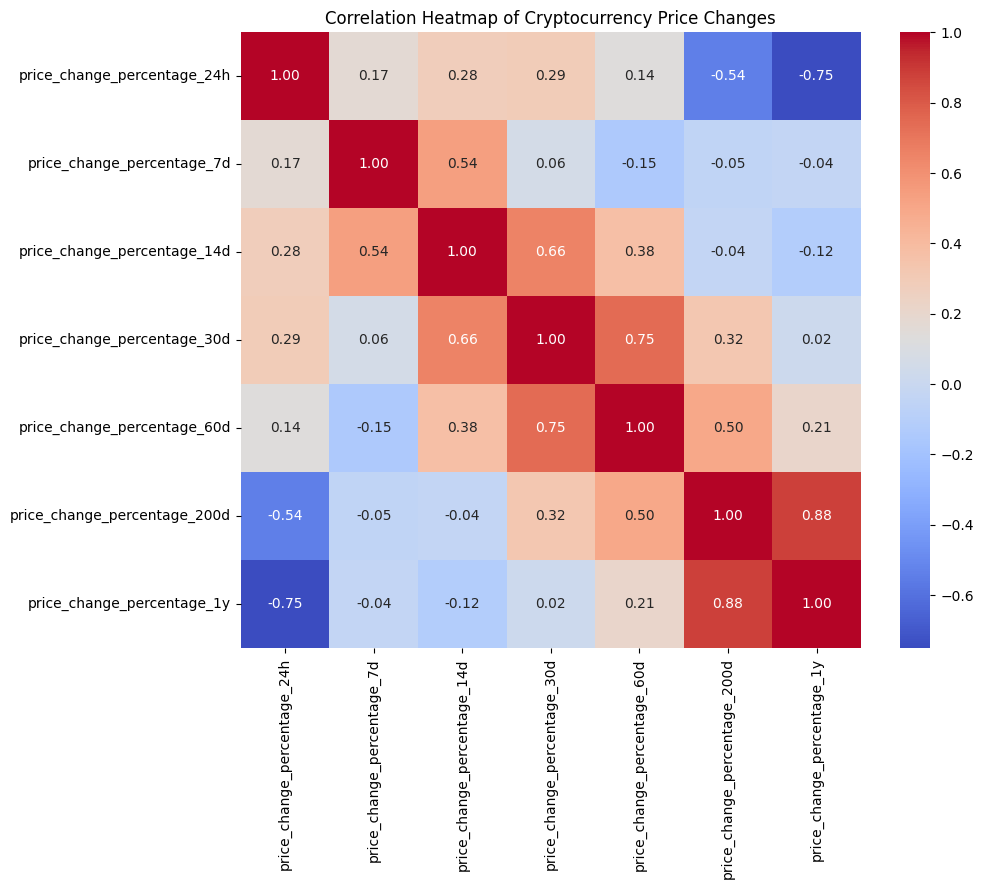

In [5]:
# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for readability
sns.heatmap(df_market_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Cryptocurrency Price Changes')

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [7]:
# Create a DataFrame with the scaled data

# Copy the crypto names from the original DataFrame
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Set the coin_id column as index
df_market_data_scaled.index = df_market_data.index

# Display the scaled DataFrame
display(df_market_data_scaled.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1)  # Added n_init for clarity and to suppress warning
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot_scaled = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve (Scaled Data)",
    label="Scaled Data",  # <--- THIS IS KEY FOR THE LEGEND
    xticks=k_values,
    xlabel="Number of Clusters (k)",
    ylabel="Inertia"
)

elbow_plot_scaled

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow plot, the best value for k appears to be 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1)

In [13]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, n_init=10, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the scaled DataFrame
df_market_data_clustered = df_market_data_scaled.copy()

In [16]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_clustered["cluster"] = clusters

# Display the copy of the scaled DataFrame
display(df_market_data_clustered.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [17]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot_scaled = df_market_data_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='cluster',  # Group by 'cluster' for COLOR
    marker= 'circle', # Use the marker styles tro differentiate
    label="Scaled Data",  # Add a label for the legend
    hover_cols=["coin_id", "source"],  # Show coin_id and source on hover
    title="Cryptocurrency Clusters (Scaled Data)"
)
scatter_plot_scaled

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
print(pca_data[:5])  # Display first 5 rows

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [20]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")

Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is approximately 0.895 (or 89.5%).  This value will vary slightly
due to the random_state in KMeans, but should be close to this value.

In [21]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"]
)

# Copy the crypto names from the original scaled DataFrame


# Set the coin_id column as index
df_market_data_pca.index = df_market_data.index

# Display the scaled PCA DataFrame
display(df_market_data_pca.head())

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))


In [23]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k, n_init = 10, random_state=1) #Added n_init
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model_pca.fit(df_market_data_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(kmeans_model_pca.inertia_)

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values_pca, "inertia": inertia_pca}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [25]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve (PCA Data)",
    label="PCA Data",  # <--- THIS IS KEY FOR THE LEGEND
    xticks=k_values_pca,
    xlabel="Number of Clusters (k)",
    ylabel="Inertia"
)

elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  Based on this PCA elbow curve, the best value for k is also 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [26]:
# Initialize the K-Means model using the best value for k
kmeans_model_pca = KMeans(n_clusters=4, n_init=10, random_state=1)

In [27]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_market_data_pca)

KMeans(n_clusters=4, n_init=10, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_pca = kmeans_model_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(clusters_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [29]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_clustered = df_market_data_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_clustered["cluster"] = clusters_pca

# Display the copy of the scaled PCA DataFrame
display(df_market_data_pca_clustered.head())

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [30]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_market_data_pca_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    by='cluster',  # Group by 'cluster' for COLOR
    marker='square', # Use the marker styles dictionary
    label="PCA Data",  # Add a label for the legend
    hover_cols=["coin_id", "source"],  # Show coin_id and source on hover
    title = "Cryptocurrency Clusters (PCA Data)"
)
scatter_plot_pca


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [31]:
# Composite plot to contrast the Elbow curves
composite_plot1 = elbow_plot_scaled * elbow_plot_pca  # Use * for overlay
composite_plot1

:Overlay
   .Curve.Scaled_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data    :Curve   [k]   (inertia)

In [32]:
# Composite plot to contrast the scatter plots

# Create HoloViews Scatter plots
scatter_plot_scaled = hv.Scatter(scaled_data, kdims=['price_change_percentage_24h', 'price_change_percentage_7d'], vdims=['cluster'])
scatter_plot_pca = hv.Scatter(pca_data, kdims=['PC1', 'PC2'], vdims=['cluster']).opts(marker='square')

# --- Color Customization ---
cluster_colors = ['#29abe2', '#f54242', '#e8b730', '#698f3f']

scatter_plot_scaled = scatter_plot_scaled.opts(
    opts.Scatter(color='cluster', cmap=cluster_colors, size=10)
)
scatter_plot_pca = scatter_plot_pca.opts(
    opts.Scatter(color='cluster', cmap=cluster_colors, size=10)
)

# --- Overlay the plots ---
composite_plot = scatter_plot_scaled * scatter_plot_pca

# --- Access Renderers *AFTER* Overlay ---
bokeh_plot = hv.render(composite_plot, backend='bokeh')

# Set the title
bokeh_plot.title.text = "Cryptocurrency Clusters (Scaled [Circles] and PCA [Squares] Data)"

# Configure axes
bokeh_plot.extra_x_ranges = {
    "pca_x": Range1d(start=scatter_plot_pca.dimension_values(0).min(), end=scatter_plot_pca.dimension_values(0).max())
}
bokeh_plot.add_layout(LinearAxis(x_range_name="pca_x", axis_label="PC1"), 'above')

bokeh_plot.extra_y_ranges = {
    "pca_y": Range1d(start=scatter_plot_pca.dimension_values(1).min(), end=scatter_plot_pca.dimension_values(1).max())
}
bokeh_plot.add_layout(LinearAxis(y_range_name="pca_y", axis_label="PC2"), 'right')

# --- Colorbar ---
color_mapper = linear_cmap(field_name='cluster', palette=cluster_colors, low=0, high=3)
colorbar = ColorBar(color_mapper=color_mapper['transform'], width=8, ticker=bokeh_plot.xaxis[0].ticker, formatter=bokeh_plot.xaxis[0].formatter)
bokeh_plot.add_layout(colorbar, 'right')

# --- Legend ---
# Find the renderers *after* rendering
scaled_renderer = None
pca_renderer = None

for renderer in bokeh_plot.renderers:
    if isinstance(renderer, Renderer) and renderer.glyph.name == 'circle':
        scaled_renderer = renderer
    elif isinstance(renderer, Renderer) and renderer.glyph.name == 'square':
        pca_renderer = renderer

legend_items = []
if scaled_renderer:
    legend_items.append(LegendItem(label="Scaled Data (Circles)", renderers=[scaled_renderer]))
if pca_renderer:
    legend_items.append(LegendItem(label="PCA Data (Squares)", renderers=[pca_renderer]))

legend = Legend(items=legend_items, location="top_right")
bokeh_plot.add_layout(legend, 'right')

# Customize legend (make glyphs transparent)
for item in legend.items:
    if item.label["value"] in ["Scaled Data (Circles)", "PCA Data (Squares)"]:
        for renderer in item.renderers:
            renderer.glyph.fill_alpha = 0
            renderer.glyph.line_alpha = 0

# --- Layout ---
bokeh_plot.width = 800
bokeh_plot.height = 600

show(bokeh_plot)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features (PCA-reduced data) results in tighter, more distinct clusters.  The original scaled data, with more features, shows more spread/overlap within the clusters.  The PCA components capture the most important variance in the data, leading to a clearer separation of the clusters when using K-Means.  However, we also lose some information in the process of reducing dimensions.